In [294]:
import pandas as pd 
from download_datasets import download_medical_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dataset_path = download_medical_dataset()
df = pd.read_csv(dataset_path)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [263]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [264]:

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [265]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [266]:
df["Bmi"] = df["Weight"] / (df["Height"] / 100) ** 2
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Bmi
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [267]:
df.corr()["PremiumPrice"].sort_values(ascending=False)

PremiumPrice               1.000000
Age                        0.697540
AnyTransplants             0.289056
NumberOfMajorSurgeries     0.264250
AnyChronicDiseases         0.208610
BloodPressureProblems      0.167097
Weight                     0.141507
Bmi                        0.103812
HistoryOfCancerInFamily    0.083139
Diabetes                   0.076209
Height                     0.026910
KnownAllergies             0.012103
Name: PremiumPrice, dtype: float64

<Axes: >

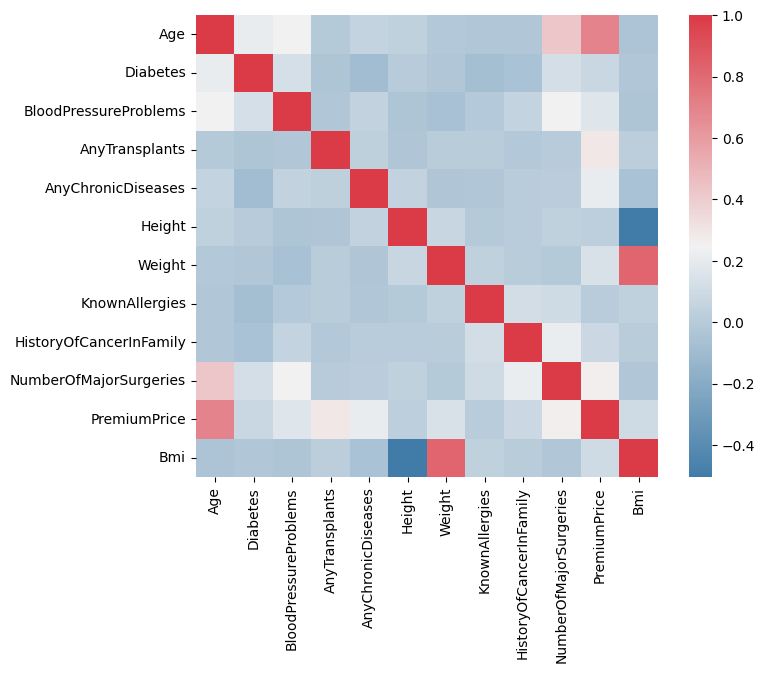

In [268]:

f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

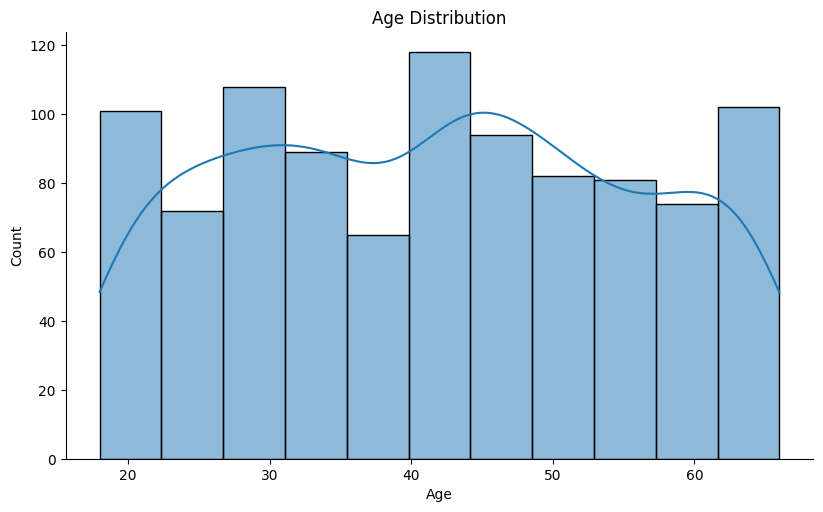

In [269]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True).set(title='Age Distribution')

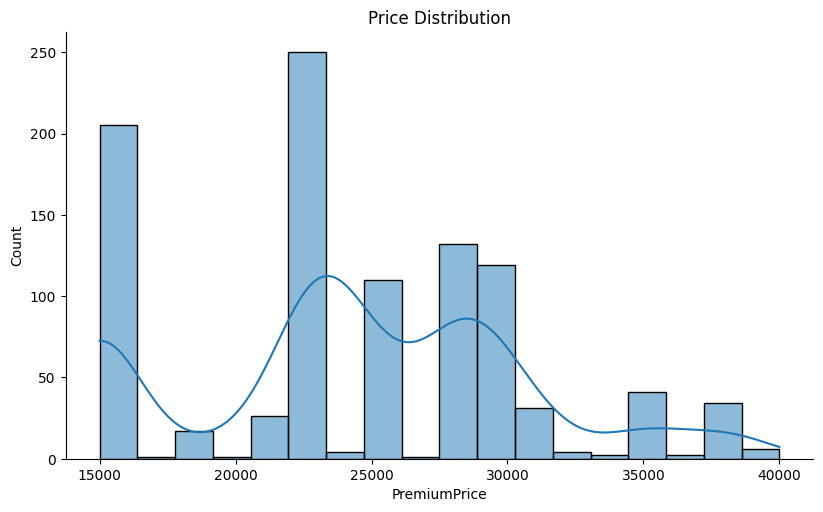

In [270]:
sns.displot(x='PremiumPrice',data=df,aspect=10/6,kde=True).set(title='Price Distribution')

In [271]:
labels = ["Low", "Basic", "Average", "High", "SuperHigh"]
df["PremiumPriceLabel"], price_bin_edges = pd.cut(df["PremiumPrice"], bins=5, labels=labels, precision=0, retbins=True)
df["AgeLabel"], age_bin_edges = pd.cut(df["Age"], bins=5, labels=labels, precision=0, retbins=True)
df["WeightLabel"], weight_bin_edges = pd.cut(df["Weight"], bins=5, labels=labels, precision=0, retbins=True)
df["HeightLabel"], height_bin_edges = pd.cut(df["Height"], bins=5, labels=labels, precision=0, retbins=True)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Bmi,PremiumPriceLabel,AgeLabel,WeightLabel,HeightLabel
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Basic,Average,Low,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Average,SuperHigh,Basic,SuperHigh
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Basic,Basic,Low,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Average,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Basic,Average,Average,Average


In [272]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Bmi,PremiumPriceLabel,AgeLabel,WeightLabel,HeightLabel
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Basic,Average,Low,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Average,SuperHigh,Basic,SuperHigh
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Basic,Basic,Low,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Average,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Basic,Average,Average,Average


In [273]:
df.groupby(['PremiumPriceLabel','AnyTransplants'], observed=True)['AnyTransplants'].count()

PremiumPriceLabel  AnyTransplants
Low                0                 213
                   1                  11
Basic              0                 382
                   1                   1
Average            0                 252
                   1                   7
High               0                  76
                   1                   2
SuperHigh          0                   8
                   1                  34
Name: AnyTransplants, dtype: int64

[Text(0.5, 1.0, 'Insurance category distribution based on number of transplants')]

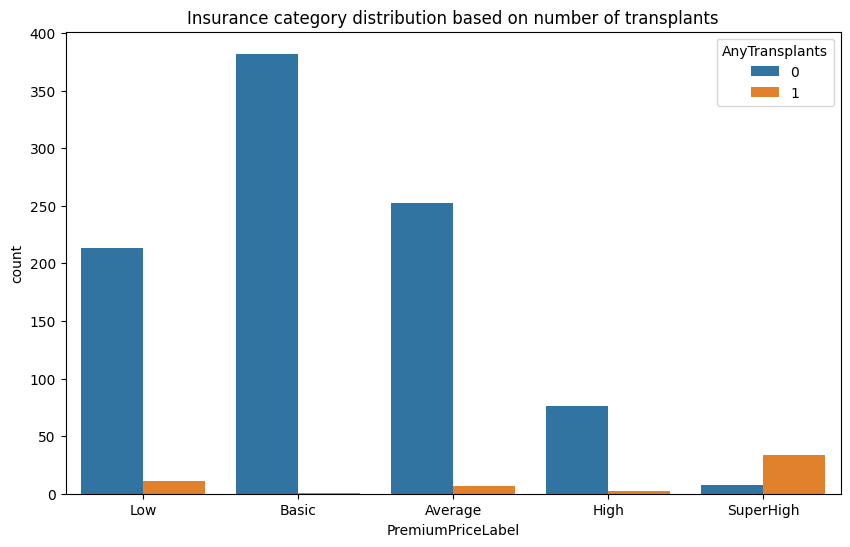

In [274]:

fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='PremiumPriceLabel',hue='AnyTransplants', data=df,ax=ax).set(title='Insurance category distribution based on number of transplants')

In [275]:
df.groupby(['PremiumPriceLabel','NumberOfMajorSurgeries'], observed=True)['NumberOfMajorSurgeries'].count()

PremiumPriceLabel  NumberOfMajorSurgeries
Low                0                         142
                   1                          82
Basic              0                         226
                   1                         156
                   2                           1
Average            0                          67
                   1                          59
                   2                         117
                   3                          16
High               0                          22
                   1                          56
SuperHigh          0                          22
                   1                          19
                   2                           1
Name: NumberOfMajorSurgeries, dtype: int64

[Text(0.5, 1.0, 'Insurance category distribution based on number of major surgeries')]

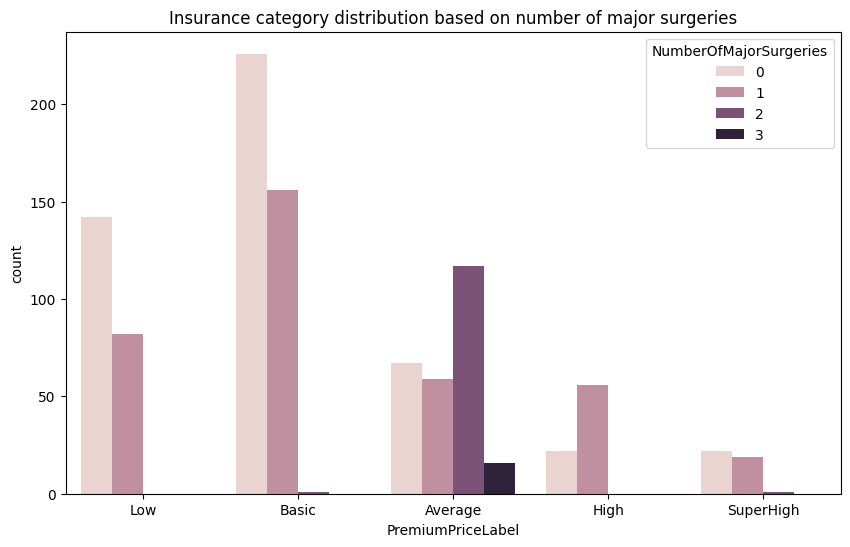

In [276]:

fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='PremiumPriceLabel',hue='NumberOfMajorSurgeries', data=df,ax=ax).set(title='Insurance category distribution based on number of major surgeries')

[Text(0.5, 1.0, 'Insurance category distribution based on age')]

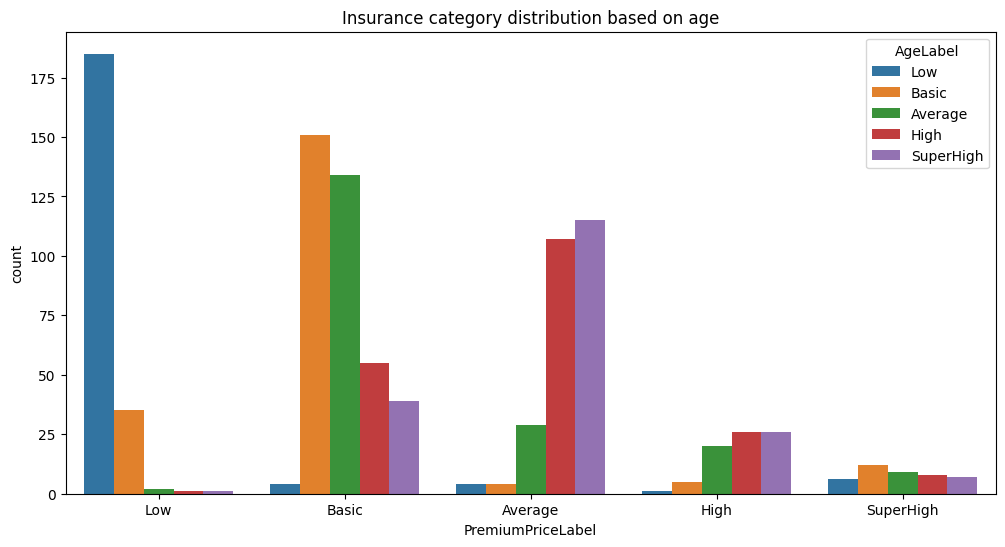

In [277]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumPriceLabel',hue='AgeLabel', data=df,ax=ax).set(title='Insurance category distribution based on age')

[Text(0.5, 1.0, 'Weight Distribution based on Age')]

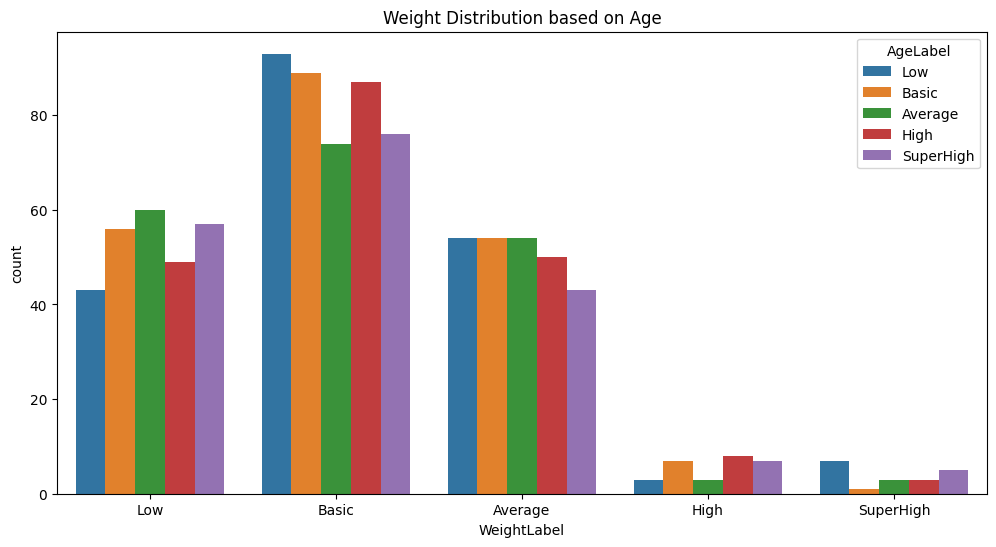

In [278]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='WeightLabel',hue='AgeLabel',data=df,ax=ax).set(title="Weight Distribution based on Age")

[Text(0.5, 1.0, 'Average Price by Age')]

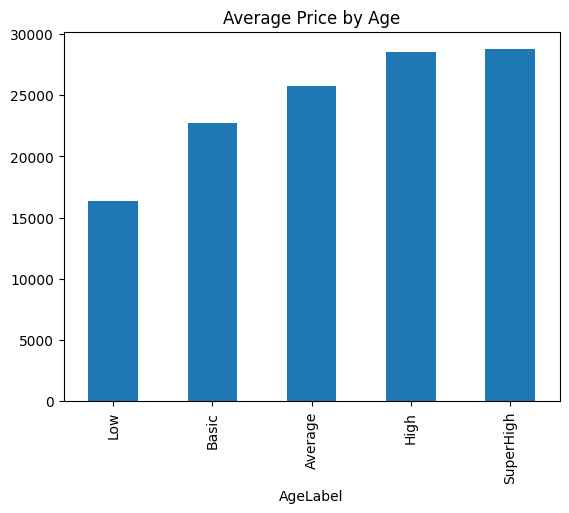

In [279]:
df.groupby(['AgeLabel'], observed=True)['PremiumPrice'].mean().plot(kind='bar').set(title='Average Price by Age')

In [280]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Bmi', 'PremiumPriceLabel', 'AgeLabel', 'WeightLabel', 'HeightLabel'],
      dtype='object')

In [281]:
from sklearn.model_selection import train_test_split
x = df.drop(["PremiumPrice", "PremiumPriceLabel", "AgeLabel", "WeightLabel", "HeightLabel"], axis=1) 
y = df["PremiumPrice"]
x.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Bmi
0,45,0,0,0,0,155,57,0,0,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,22.530864
2,36,1,1,0,0,158,59,0,0,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,27.770313
4,38,0,0,0,1,166,88,0,0,1,31.934969


In [282]:
from numpy import ndarray
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

def show_performance(y_test: pd.Series, y_pred: ndarray):
    print(f"Mean: {y_test.mean()}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print(f"MRSE: {math.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

In [283]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
ltr = LinearRegression().fit(x_train,y_train)
y_pred = ltr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.5689234450486103
MRSE: 4103.738011813263
MAE: 2827.235805419154
MAPE: 0.11248880525423154


In [284]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_quad,y, random_state=0)
plr = LinearRegression().fit(x_train,y_train)
y_pred = plr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.5938420773930572
MRSE: 3983.363044271065
MAE: 2613.5556531609154
MAPE: 0.10388379914411427


In [285]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
dtr = DecisionTreeRegressor().fit(x_train,y_train)
y_pred = dtr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.46442450103003674
MRSE: 4574.174999174925
MAE: 1400.8097165991903
MAPE: 0.059885098297673925


In [286]:
from sklearn.ensemble import RandomForestRegressor
gbr = RandomForestRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.6567121061000835
MRSE: 3662.112396756513
MAE: 1410.0404858299596
MAPE: 0.05469612849738474


In [287]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.6406691580082395
MRSE: 3746.706492124365
MAE: 1840.6392832127972
MAPE: 0.06891442680209214


In [297]:
import joblib
from typing import NamedTuple
from pathlib import Path

# NOTE: When you update this dto, don't forget to update the corresponding
#       dto in Fyama/backend/ml/dto.py
class MedicalModelDto(NamedTuple):
    model: GradientBoostingRegressor

models_dir = Path("models")
if not models_dir.is_dir():
    models_dir.mkdir(parents=True)

joblib.dump(value=MedicalModelDto(model=gbr), filename=models_dir / "medical.pkl")

['models\\medical.pkl']

In [289]:
from sklearn.svm import SVR
svr = SVR(kernel="linear")
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.3729268638020551
MRSE: 4949.502219375143
MAE: 3193.457544775982
MAPE: 0.11971561851192687


In [290]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
mlpr.fit(x_train, y_train)
y_pred = mlpr.predict(x_test)
show_performance(y_test, y_pred)

Mean: 24813.765182186235
R^2 Score: 0.5264067134995276
MRSE: 4301.354076079406
MAE: 2765.818904352495
MAPE: 0.105760296422184


c:\Users\PC\Dev\Python\Fyama\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
